In [64]:
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
data = pd.read_csv("en_lpor_explorer.csv")
data.head()

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,Gabriel Pereira,Female,18,Urban,Above 3,Separated,Higher Education,Higher Education,Homemaker,Teacher,...,No,Good,Moderate,High,Very Low,Very Low,Fair,4,0,11
1,Gabriel Pereira,Female,17,Urban,Above 3,Living Together,Primary School,Primary School,Homemaker,other,...,No,Excellent,Moderate,Moderate,Very Low,Very Low,Fair,2,9,11
2,Gabriel Pereira,Female,15,Urban,Up to 3,Living Together,Primary School,Primary School,Homemaker,other,...,No,Good,Moderate,Low,Low,Moderate,Fair,6,12,13
3,Gabriel Pereira,Female,15,Urban,Above 3,Living Together,Higher Education,Lower Secondary School,Health,Services,...,Yes,Fair,Low,Low,Very Low,Very Low,Very Good,0,14,14
4,Gabriel Pereira,Female,16,Urban,Above 3,Living Together,High School,High School,other,other,...,No,Good,Moderate,Low,Very Low,Low,Very Good,0,11,13


In [66]:
data.dtypes

School                          object
Gender                          object
Age                              int64
Housing_Type                    object
Family_Size                     object
Parental_Status                 object
Mother_Education                object
Father_Education                object
Mother_Work                     object
Father_Work                     object
Reason_School_Choice            object
Legal_Responsibility            object
Commute_Time                    object
Weekly_Study_Time               object
Extra_Educational_Support       object
Parental_Educational_Support    object
Private_Tutoring                object
Extracurricular_Activities      object
Attended_Daycare                object
Desire_Graduate_Education       object
Has_Internet                    object
Is_Dating                       object
Good_Family_Relationship        object
Free_Time_After_School          object
Time_with_Friends               object
Alcohol_Weekdays         

# Convert object to category

In [67]:
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].astype("category")

In [68]:
data.dtypes

School                          category
Gender                          category
Age                                int64
Housing_Type                    category
Family_Size                     category
Parental_Status                 category
Mother_Education                category
Father_Education                category
Mother_Work                     category
Father_Work                     category
Reason_School_Choice            category
Legal_Responsibility            category
Commute_Time                    category
Weekly_Study_Time               category
Extra_Educational_Support       category
Parental_Educational_Support    category
Private_Tutoring                category
Extracurricular_Activities      category
Attended_Daycare                category
Desire_Graduate_Education       category
Has_Internet                    category
Is_Dating                       category
Good_Family_Relationship        category
Free_Time_After_School          category
Time_with_Friend

# One Hot endcoding

In [69]:
for col in data.columns:
    if data[col].dtype == "category":
        data[col] = data[col].cat.codes 

In [70]:
data

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,0,0,18,1,0,1,1,1,1,3,...,0,2,2,0,4,4,0,4,0,11
1,0,0,17,1,0,0,3,3,1,4,...,0,0,2,2,4,4,0,2,9,11
2,0,0,15,1,1,0,3,3,1,4,...,0,2,2,1,1,2,0,6,12,13
3,0,0,15,1,0,0,1,2,0,2,...,1,1,1,1,4,4,3,0,14,14
4,0,0,16,1,0,0,0,0,4,4,...,0,2,2,1,4,1,3,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,0,2,0,2,4,...,0,0,0,1,4,1,3,4,10,11
645,1,0,18,1,1,0,0,3,3,2,...,0,2,2,0,4,4,4,4,15,15
646,1,0,18,1,0,0,3,3,4,4,...,0,4,4,4,4,4,3,6,11,12
647,1,1,17,1,1,0,0,3,2,2,...,0,3,0,3,2,0,2,6,10,10


# Check corr

In [71]:
a = data.corr(method="spearman", numeric_only=True)
a["Grade_1st_Semester"].index

Index(['School', 'Gender', 'Age', 'Housing_Type', 'Family_Size',
       'Parental_Status', 'Mother_Education', 'Father_Education',
       'Mother_Work', 'Father_Work', 'Reason_School_Choice',
       'Legal_Responsibility', 'Commute_Time', 'Weekly_Study_Time',
       'Extra_Educational_Support', 'Parental_Educational_Support',
       'Private_Tutoring', 'Extracurricular_Activities', 'Attended_Daycare',
       'Desire_Graduate_Education', 'Has_Internet', 'Is_Dating',
       'Good_Family_Relationship', 'Free_Time_After_School',
       'Time_with_Friends', 'Alcohol_Weekdays', 'Alcohol_Weekends',
       'Health_Status', 'School_Absence', 'Grade_1st_Semester',
       'Grade_2nd_Semester'],
      dtype='object')

Text(0.5, 1.0, 'Corr with Grade_1st_Semester and drop Grade_2nd_Semester')

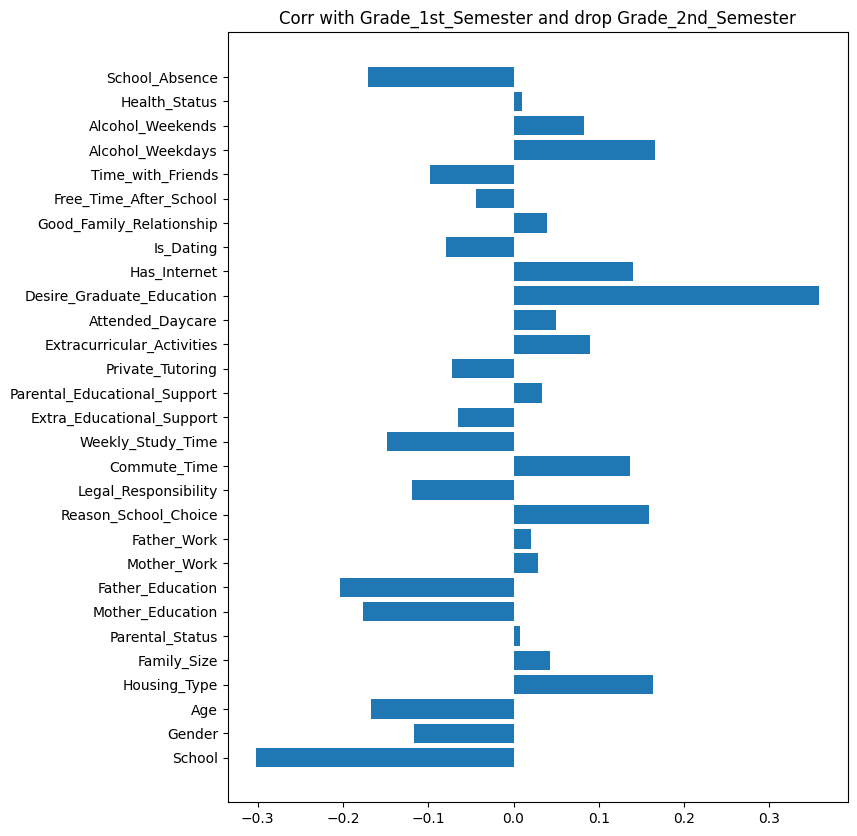

In [72]:
plt.figure(figsize=(8, 10))
a_cle = a["Grade_1st_Semester"].drop(index=['Grade_2nd_Semester', 'Grade_1st_Semester'])
plt.barh(a_cle.index, a_cle.values)
plt.title("Corr with Grade_1st_Semester and drop Grade_2nd_Semester")

Text(0.5, 1.0, 'Corr with Grade_2nd_Semester')

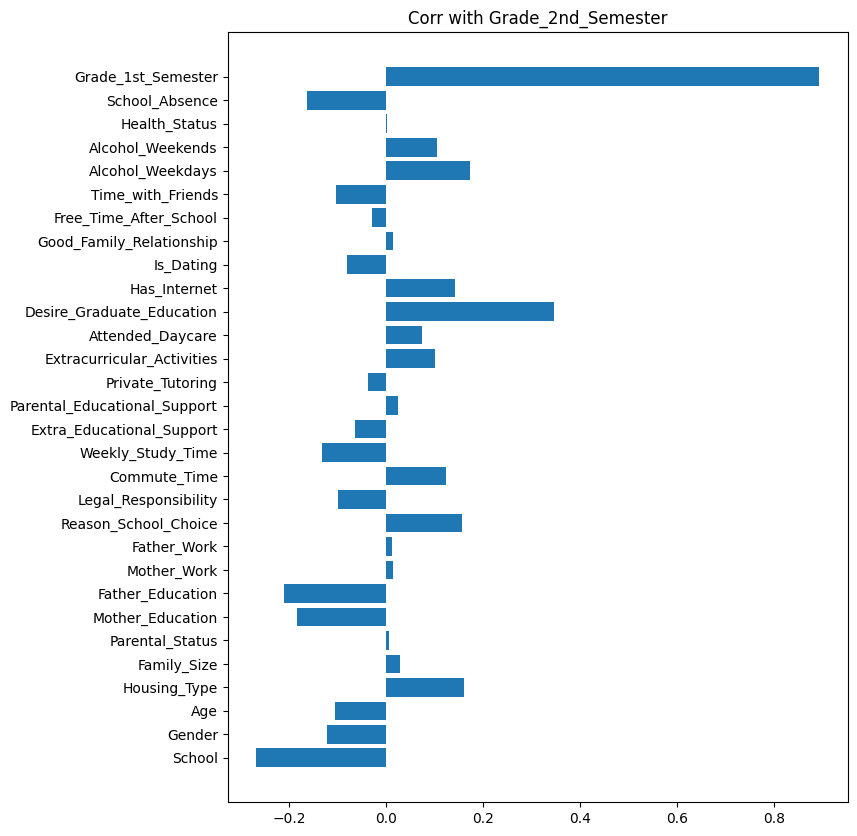

In [73]:
plt.figure(figsize=(8, 10))
b_cle = a["Grade_2nd_Semester"].drop(index=['Grade_2nd_Semester'])
plt.barh(b_cle.index, b_cle.values)
plt.title("Corr with Grade_2nd_Semester")

### `WTF more ALCOHOL more score`

# StandardScaler data

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler().fit(data)
data_scale = scaler.fit_transform(data)

In [76]:
data_scale_df = pd.DataFrame(data_scale, columns=data.columns)
data_scale_df.head()

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,-0.730944,-0.833377,1.031695,0.660182,-0.648175,2.666927,-0.456393,-0.570907,-1.123850,-0.042676,...,-0.763496,0.573186,0.393931,-1.382021,0.628978,1.112662,-1.550457,0.073433,-4.155470,-0.195820
1,-0.730944,-0.833377,0.210137,0.660182,-0.648175,-0.374963,1.389085,1.227726,-1.123850,0.796623,...,-0.763496,-1.344328,0.393931,0.283590,0.628978,1.112662,-1.550457,-0.357863,-0.874570,-0.195820
2,-0.730944,-0.833377,-1.432980,0.660182,1.542792,-0.374963,1.389085,1.227726,-1.123850,0.796623,...,-0.763496,0.573186,0.393931,-0.549216,-1.664319,-0.220889,-1.550457,0.504730,0.219064,0.491137
3,-0.730944,-0.833377,-1.432980,0.660182,-0.648175,-0.374963,-0.456393,0.328410,-1.848879,-0.881975,...,1.309764,-0.385571,-0.444303,-0.549216,0.628978,1.112662,0.651395,-0.789159,0.948153,0.834615
4,-0.730944,-0.833377,-0.611422,0.660182,-0.648175,-0.374963,-1.379133,-1.470223,1.051236,0.796623,...,-0.763496,0.573186,0.393931,-0.549216,0.628978,-0.887664,0.651395,-0.789159,-0.145481,0.491137


# XGBoost

In [77]:
import xgboost as xgb

### Grade_1st_Semester

In [78]:
x1 = data_scale_df.drop(labels=["Grade_1st_Semester", "Grade_2nd_Semester"], axis=1)
y1 = data_scale_df["Grade_1st_Semester"]

xg1 = xgb.XGBRegressor()

xg1.fit(x1, y1)
xg1.score(x1, y1)

0.9996250637154791

<Axes: >

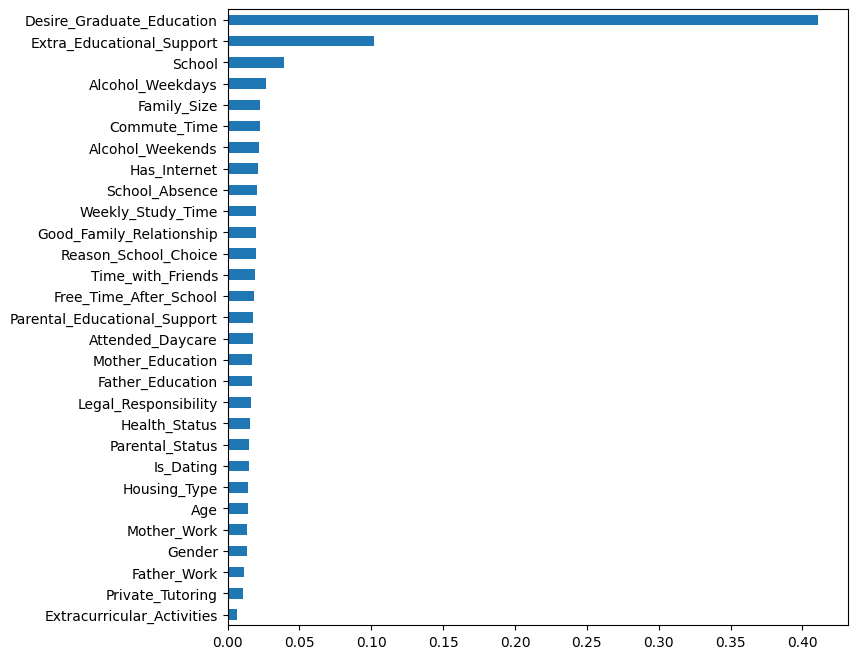

In [79]:
pd.Series(
    xg1.feature_importances_, index=x1.columns
).sort_values().plot.barh(figsize=(8,8))

### Grade_2nd_Semester

In [80]:
x2 = data_scale_df.drop(labels=["Grade_2nd_Semester"], axis=1)
y2 = data_scale_df["Grade_2nd_Semester"]

xg2 = xgb.XGBRegressor()

xg2.fit(x2, y2)
xg2.score(x2, y2)

0.9999637515563288

<Axes: >

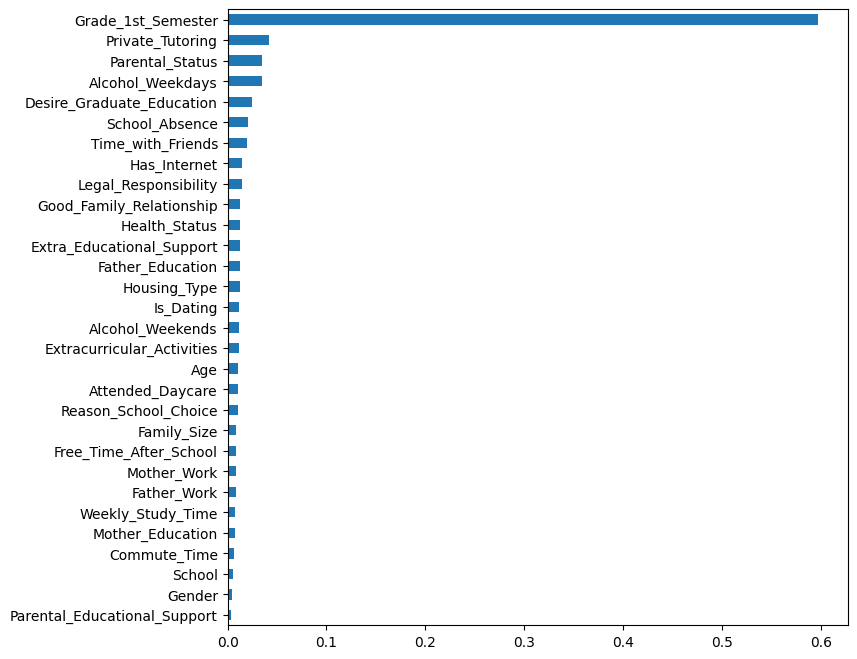

In [81]:
pd.Series(
    xg2.feature_importances_, index=x2.columns
).sort_values().plot.barh(figsize=(8,8))